**1. Importing the dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

**2. Data Loading and Understanding**

In [ ]:
# load teh csv data to a pandas dataframe
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("/content/Merged_Churn_Data.csv")

In [ ]:
df.shape

(7043, 51)

In [ ]:
df.head()

,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married,tenure,internet_service,phone_service,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,monthly_charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason,country,state,city,zip_code,total_population,latitude,longitude
0,0002-ORFBO,Female,37,No,No,Yes,No,0,Yes,9,Yes,Yes,No,16,Yes,NaN,Yes,2,No,Yes,No,Yes,Yes,No,No,Cable,One Year,Yes,Mailed check,65.6,42.39,593.30,0.00,0,381.51,974.81,3,2205,Stayed,65,No,0,Not Applicable,NaN,United States,California,Frazier Park,93225,4498,34.827662,-118.999073
1,0003-MKNFE,Male,46,No,No,No,No,0,No,9,Yes,Yes,Yes,10,No,NaN,No,0,No,No,No,No,No,Yes,Yes,Cable,Month-to-Month,No,Mailed check,59.9,10.69,542.40,38.33,10,96.21,610.28,5,5414,Stayed,66,No,0,Not Applicable,NaN,United States,California,Glendale,91206,31297,34.162515,-118.203869
2,0004-TLHLJ,Male,50,No,No,No,No,0,No,4,Yes,Yes,No,30,Yes,Offer E,No,0,No,No,Yes,No,No,No,No,Fiber Optic,Month-to-Month,Yes,Electronic check,73.9,33.65,280.85,0.00,0,134.60,415.45,1,4479,Churned,71,Yes,1,Competitor,Competitor had better devices,United States,California,Costa Mesa,92627,62069,33.645672,-117.922613
3,0011-IGKFF,Male,78,No,Yes,Yes,No,0,Yes,13,Yes,Yes,No,4,Yes,Offer D,Yes,1,No,Yes,Yes,No,Yes,Yes,No,Fiber Optic,Month-to-Month,Yes,Electronic check,98.0,27.82,1237.85,0.00,0,361.66,1599.51,1,3714,Churned,91,Yes,1,Dissatisfaction,Product dissatisfaction,United States,California,Martinez,94553,46677,38.014457,-122.115432
4,0013-EXCHZ,Female,75,No,Yes,Yes,No,0,Yes,3,Yes,Yes,No,11,Yes,NaN,Yes,3,No,No,No,Yes,Yes,No,No,Fiber Optic,Month-to-Month,Yes,Mailed check,83.9,7.38,267.40,0.00,0,22.14,289.54,1,3464,Churned,68,Yes,1,Dissatisfaction,Network reliability,United States,California,Camarillo,93010,42853,34.227846,-119.079903


In [ ]:
survival_df = pd.read_csv('/content/survival_features.csv')

In [ ]:
print("Dataset chính:", df.columns.tolist())
print("Dataset survival:", survival_df.columns.tolist())


Dataset chính: ['customer_id', 'gender', 'age', 'under_30', 'senior_citizen', 'partner', 'dependents', 'number_of_dependents', 'married', 'tenure', 'internet_service', 'phone_service', 'multiple_lines', 'avg_monthly_gb_download', 'unlimited_data', 'offer', 'referred_a_friend', 'number_of_referrals', 'online_security', 'online_backup', 'device_protection', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'internet_type', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'avg_monthly_long_distance_charges', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue', 'satisfaction_score', 'cltv', 'customer_status', 'churn_score', 'churn_label', 'churn_value', 'churn_category', 'churn_reason', 'country', 'state', 'city', 'zip_code', 'total_population', 'latitude', 'longitude']
Dataset survival: ['customer_id', 'hazard_score', 'baseline_hazard', 'hazard_group']


In [ ]:
survival_df = pd.read_csv('/content/survival_features.csv')

# Ghép dữ liệu lại bằng customer_id
df_merged = df.merge(survival_df, on='customer_id', how='left')

# Kiểm tra lại dữ liệu sau merge
df = df_merged

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
df.head(2)

,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married,tenure,internet_service,phone_service,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,monthly_charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason,country,state,city,zip_code,total_population,latitude,longitude,hazard_score,baseline_hazard,hazard_group
0,0002-ORFBO,Female,37,No,No,Yes,No,0,Yes,9,Yes,Yes,No,16,Yes,NaN,Yes,2,No,Yes,No,Yes,Yes,No,No,Cable,One Year,Yes,Mailed check,65.6,42.39,593.3,0.00,0,381.51,974.81,3,2205,Stayed,65,No,0,Not Applicable,NaN,United States,California,Frazier Park,93225,4498,34.827662,-118.999073,5.019091,0.000385,Medium-High
1,0003-MKNFE,Male,46,No,No,No,No,0,No,9,Yes,Yes,Yes,10,No,NaN,No,0,No,No,No,No,No,Yes,Yes,Cable,Month-to-Month,No,Mailed check,59.9,10.69,542.4,38.33,10,96.21,610.28,5,5414,Stayed,66,No,0,Not Applicable,NaN,United States,California,Glendale,91206,31297,34.162515,-118.203869,6.939038,0.000385,High


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   age                                7043 non-null   int64  
 3   under_30                           7043 non-null   object 
 4   senior_citizen                     7043 non-null   object 
 5   partner                            7043 non-null   object 
 6   dependents                         7043 non-null   object 
 7   number_of_dependents               7043 non-null   int64  
 8   married                            7043 non-null   object 
 9   tenure                             7043 non-null   int64  
 10  internet_service                   7043 non-null   object 
 11  phone_service                      7043 non-null   objec

In [ ]:
# dropping customerID column as this is not required for modelling
df = df.drop(columns=["customer_id"])

In [ ]:
df.head(2)

,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married,tenure,internet_service,phone_service,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,monthly_charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason,country,state,city,zip_code,total_population,latitude,longitude,hazard_score,baseline_hazard,hazard_group
0,Female,37,No,No,Yes,No,0,Yes,9,Yes,Yes,No,16,Yes,NaN,Yes,2,No,Yes,No,Yes,Yes,No,No,Cable,One Year,Yes,Mailed check,65.6,42.39,593.3,0.00,0,381.51,974.81,3,2205,Stayed,65,No,0,Not Applicable,NaN,United States,California,Frazier Park,93225,4498,34.827662,-118.999073,5.019091,0.000385,Medium-High
1,Male,46,No,No,No,No,0,No,9,Yes,Yes,Yes,10,No,NaN,No,0,No,No,No,No,No,Yes,Yes,Cable,Month-to-Month,No,Mailed check,59.9,10.69,542.4,38.33,10,96.21,610.28,5,5414,Stayed,66,No,0,Not Applicable,NaN,United States,California,Glendale,91206,31297,34.162515,-118.203869,6.939038,0.000385,High


In [ ]:
df.columns

Index(['gender', 'age', 'under_30', 'senior_citizen', 'partner', 'dependents',
       'number_of_dependents', 'married', 'tenure', 'internet_service',
       'phone_service', 'multiple_lines', 'avg_monthly_gb_download',
       'unlimited_data', 'offer', 'referred_a_friend', 'number_of_referrals',
       'online_security', 'online_backup', 'device_protection',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'internet_type', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges',
       'avg_monthly_long_distance_charges', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'satisfaction_score', 'cltv', 'customer_status',
       'churn_score', 'churn_label', 'churn_value', 'churn_category',
       'churn_reason', 'country', 'state', 'city', 'zip_code',
       'total_population', 'latitude', 'longitude', 'hazard_score',
       'baseline_hazard', 'hazard

In [ ]:
print(df["gender"].unique())

['Female' 'Male']


In [ ]:
print(df["internet_type"].unique())

['Cable' 'Fiber Optic' 'DSL' nan]


In [ ]:
# printing the unique values in all the columns

numerical_features_list = ["tenure", "monthly_charges", "total_charges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
age [37 46 50 78 75 23 67 52 68 43 47 25 58 32 39 72 79 26 30 22 34 42 64 48
 28 33 31 60 69 20 57 19 38 54 35 51 66 61 24 55 59 71 49 40 21 45 29 62
 76 77 73 41 56 80 63 53 44 70 74 36 27 65]
--------------------------------------------------
under_30 ['No' 'Yes']
--------------------------------------------------
senior_citizen ['No' 'Yes']
--------------------------------------------------
partner ['Yes' 'No']
--------------------------------------------------
dependents ['No' 'Yes']
--------------------------------------------------
number_of_dependents [0 3 1 2 4 6 5 9 7 8]
--------------------------------------------------
married ['Yes' 'No']
--------------------------------------------------
internet_service ['Yes' 'No']
--------------------------------------------------
phone_service ['Yes' 'No']
--------------------------------------------------
multiple_lines ['No' 'Yes']
---------------------------

In [ ]:
print(df.isnull().sum())

gender                                  0
age                                     0
under_30                                0
senior_citizen                          0
partner                                 0
dependents                              0
number_of_dependents                    0
married                                 0
tenure                                  0
internet_service                        0
phone_service                           0
multiple_lines                          0
avg_monthly_gb_download                 0
unlimited_data                          0
offer                                3877
referred_a_friend                       0
number_of_referrals                     0
online_security                         0
online_backup                           0
device_protection                       0
premium_tech_support                    0
streaming_tv                            0
streaming_movies                        0
streaming_music                   

In [ ]:
df[df["total_charges"]==" "]

,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married,tenure,internet_service,phone_service,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,monthly_charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason,country,state,city,zip_code,total_population,latitude,longitude,hazard_score,baseline_hazard,hazard_group


In [ ]:
df['offer'] = df['offer'].fillna('No Offer')
df['internet_type'] = df['internet_type'].fillna('Unknown')
df['churn_reason'] = df['churn_reason'].fillna('Not Churned')


In [ ]:
print(df.isnull().sum())

gender                               0
age                                  0
under_30                             0
senior_citizen                       0
partner                              0
dependents                           0
number_of_dependents                 0
married                              0
tenure                               0
internet_service                     0
phone_service                        0
multiple_lines                       0
avg_monthly_gb_download              0
unlimited_data                       0
offer                                0
referred_a_friend                    0
number_of_referrals                  0
online_security                      0
online_backup                        0
device_protection                    0
premium_tech_support                 0
streaming_tv                         0
streaming_movies                     0
streaming_music                      0
internet_type                        0
contract                 

In [ ]:
# checking the class distribution of target column
print(df["churn_label"].value_counts())

churn_label
No     5174
Yes    1869
Name: count, dtype: int64


**Insights:**
1. Customer ID removed as it is not required for modelling
2. No missing values in the dataset
3. Missing values in the Internet Type, Offer, Churn Reason columns were replaced with 0
4. Class imbalance identified in the target

**3. Exploratory Data Analysis (EDA)**

In [ ]:
df.shape

(7043, 53)

In [ ]:
df.columns

Index(['gender', 'age', 'under_30', 'senior_citizen', 'partner', 'dependents',
       'number_of_dependents', 'married', 'tenure', 'internet_service',
       'phone_service', 'multiple_lines', 'avg_monthly_gb_download',
       'unlimited_data', 'offer', 'referred_a_friend', 'number_of_referrals',
       'online_security', 'online_backup', 'device_protection',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'internet_type', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges',
       'avg_monthly_long_distance_charges', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'satisfaction_score', 'cltv', 'customer_status',
       'churn_score', 'churn_label', 'churn_value', 'churn_category',
       'churn_reason', 'country', 'state', 'city', 'zip_code',
       'total_population', 'latitude', 'longitude', 'hazard_score',
       'baseline_hazard', 'hazard

In [ ]:
df.head(2)

,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married,tenure,internet_service,phone_service,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,monthly_charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason,country,state,city,zip_code,total_population,latitude,longitude,hazard_score,baseline_hazard,hazard_group
0,Female,37,No,No,Yes,No,0,Yes,9,Yes,Yes,No,16,Yes,No Offer,Yes,2,No,Yes,No,Yes,Yes,No,No,Cable,One Year,Yes,Mailed check,65.6,42.39,593.3,0.00,0,381.51,974.81,3,2205,Stayed,65,No,0,Not Applicable,Not Churned,United States,California,Frazier Park,93225,4498,34.827662,-118.999073,5.019091,0.000385,Medium-High
1,Male,46,No,No,No,No,0,No,9,Yes,Yes,Yes,10,No,No Offer,No,0,No,No,No,No,No,Yes,Yes,Cable,Month-to-Month,No,Mailed check,59.9,10.69,542.4,38.33,10,96.21,610.28,5,5414,Stayed,66,No,0,Not Applicable,Not Churned,United States,California,Glendale,91206,31297,34.162515,-118.203869,6.939038,0.000385,High


In [ ]:
df.describe()

,age,number_of_dependents,tenure,avg_monthly_gb_download,number_of_referrals,monthly_charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,cltv,churn_score,churn_value,zip_code,total_population,latitude,longitude,hazard_score,baseline_hazard
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,32.371149,20.515405,1.951867,64.761692,22.958954,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,4400.295755,58.505040,0.265370,93486.071134,22139.814568,36.197455,-119.756684,2.267034,0.230267
std,16.750352,0.962802,24.559481,20.418940,3.001199,30.090047,15.448113,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,1183.057152,21.170031,0.441561,1856.768045,21152.174407,2.468929,2.154425,4.503166,0.542962
min,19.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,2003.000000,5.000000,0.000000,90001.000000,11.000000,32.555828,-124.301372,-9.946965,0.000000
25%,32.000000,0.000000,9.000000,3.000000,0.000000,35.500000,9.210000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,3469.000000,40.000000,0.000000,92101.000000,2344.000000,33.990646,-121.788090,-1.230281,0.000385
50%,46.000000,0.000000,29.000000,17.000000,0.000000,70.350000,22.890000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,4527.000000,61.000000,0.000000,93518.000000,17554.000000,36.205465,-119.595293,2.979839,0.003593
75%,60.000000,0.000000,55.000000,27.000000,3.000000,89.850000,36.395000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,5380.500000,75.500000,1.000000,95329.000000,36125.000000,38.161321,-117.969795,6.033419,0.097924
max,80.000000,9.000000,72.000000,85.000000,11.000000,118.750000,49.990000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,6500.000000,96.000000,1.000000,96150.000000,105285.000000,41.962127,-114.192901,9.698524,2.178884


**Numerical Features - Analysis**

Understand the distribution of teh numerical features

In [ ]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

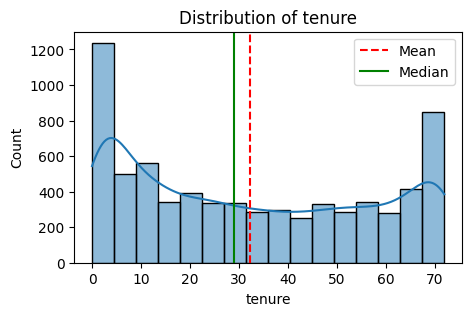

In [ ]:
plot_histogram(df, "tenure")

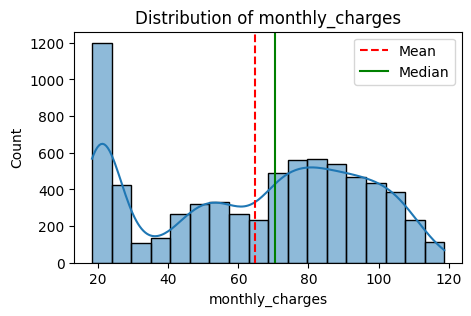

In [ ]:
plot_histogram(df, "monthly_charges")

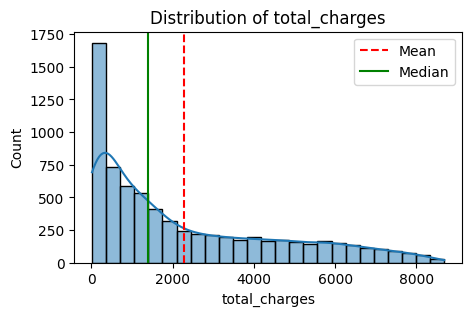

In [ ]:
plot_histogram(df, "total_charges")

**Box plot for numerical features**

In [ ]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

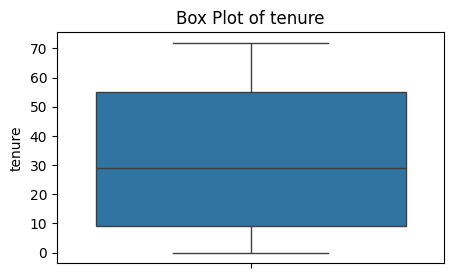

In [ ]:
plot_boxplot(df, "tenure")

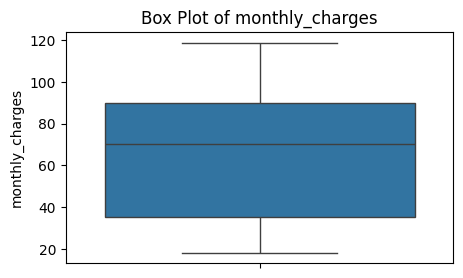

In [ ]:
plot_boxplot(df, "monthly_charges")

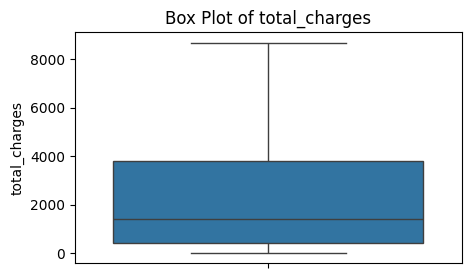

In [ ]:
plot_boxplot(df, "total_charges")

**Correlation Heatmap for numerical columns**

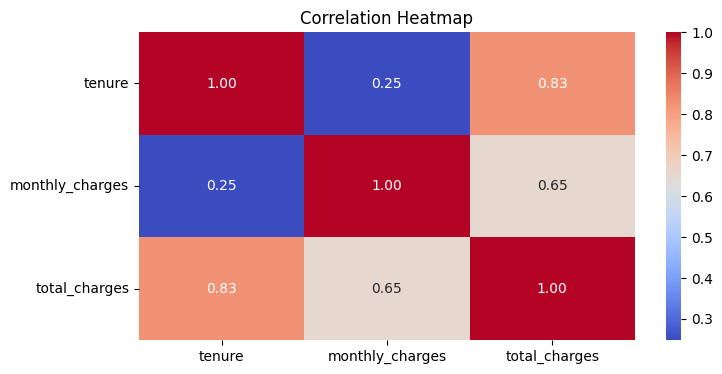

In [ ]:
# correlation matrix - heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "monthly_charges", "total_charges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Categorical features - Analysis

In [ ]:
df.columns

Index(['gender', 'age', 'under_30', 'senior_citizen', 'partner', 'dependents',
       'number_of_dependents', 'married', 'tenure', 'internet_service',
       'phone_service', 'multiple_lines', 'avg_monthly_gb_download',
       'unlimited_data', 'offer', 'referred_a_friend', 'number_of_referrals',
       'online_security', 'online_backup', 'device_protection',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'internet_type', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges',
       'avg_monthly_long_distance_charges', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'satisfaction_score', 'cltv', 'customer_status',
       'churn_score', 'churn_label', 'churn_value', 'churn_category',
       'churn_reason', 'country', 'state', 'city', 'zip_code',
       'total_population', 'latitude', 'longitude', 'hazard_score',
       'baseline_hazard', 'hazard

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             7043 non-null   object 
 1   age                                7043 non-null   int64  
 2   under_30                           7043 non-null   object 
 3   senior_citizen                     7043 non-null   object 
 4   partner                            7043 non-null   object 
 5   dependents                         7043 non-null   object 
 6   number_of_dependents               7043 non-null   int64  
 7   married                            7043 non-null   object 
 8   tenure                             7043 non-null   int64  
 9   internet_service                   7043 non-null   object 
 10  phone_service                      7043 non-null   object 
 11  multiple_lines                     7043 non-null   objec

Countplot for categorical columns

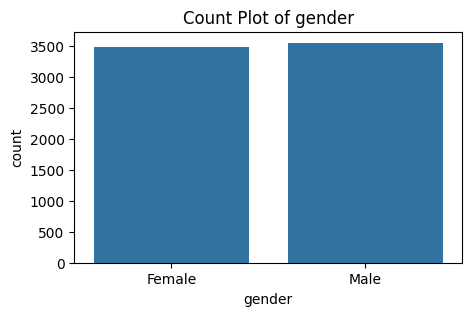

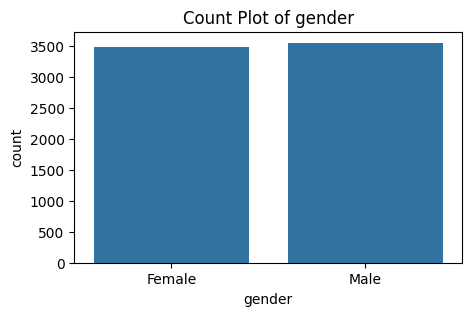

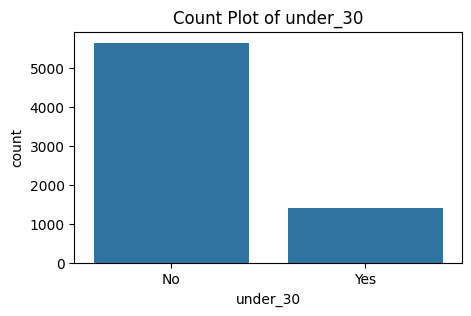

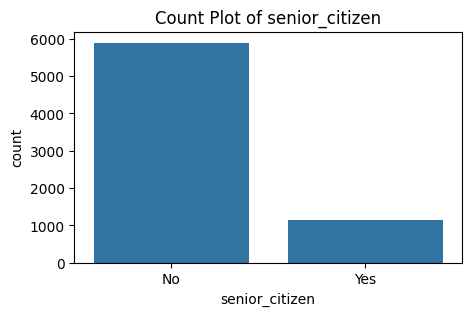

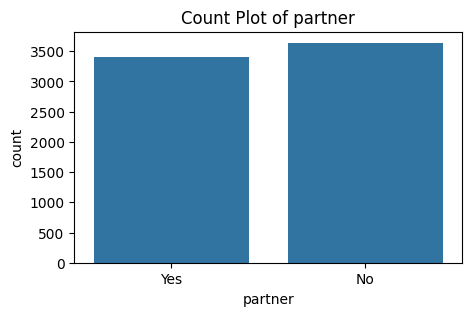

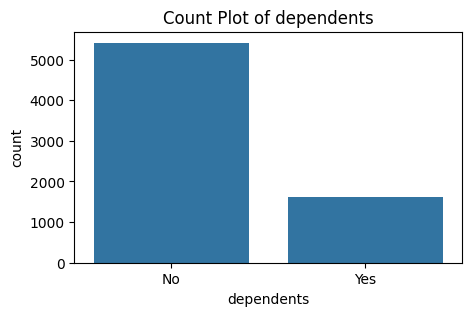

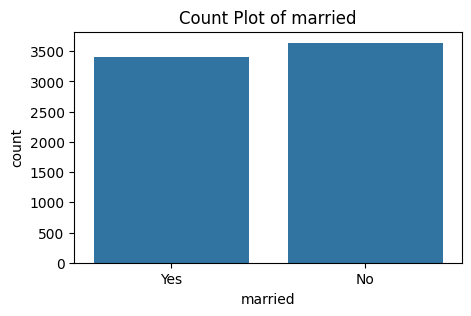

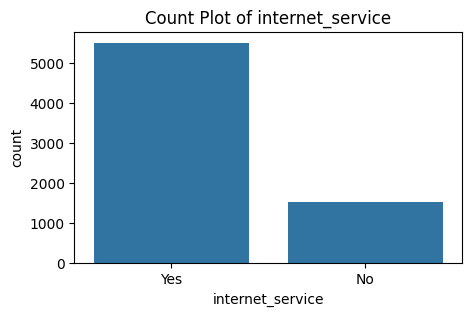

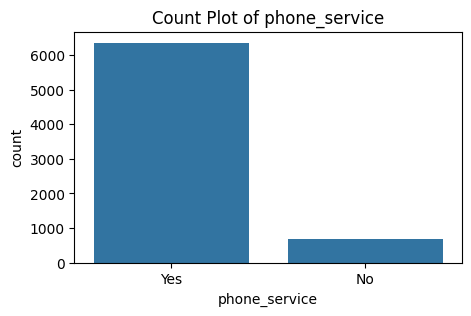

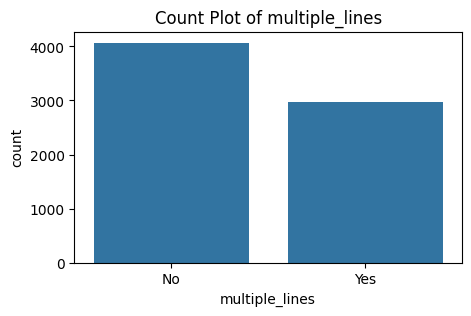

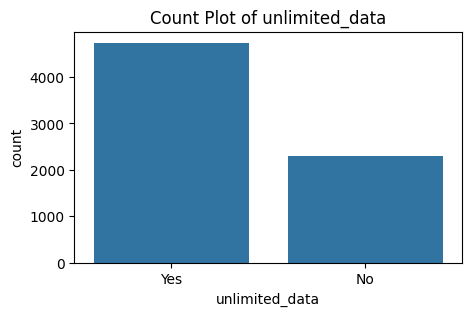

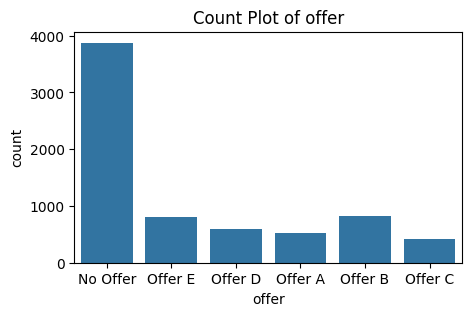

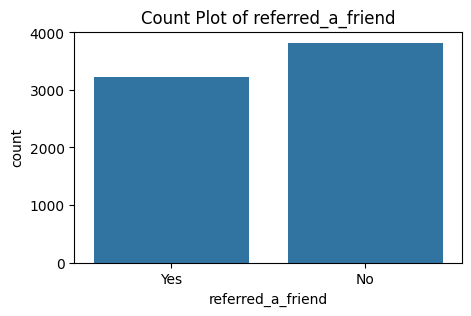

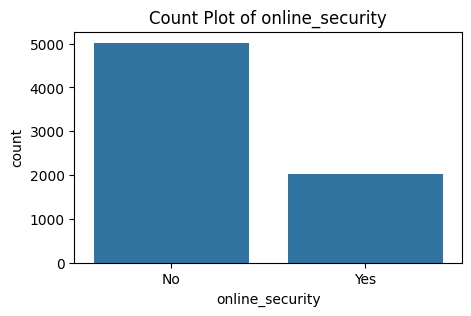

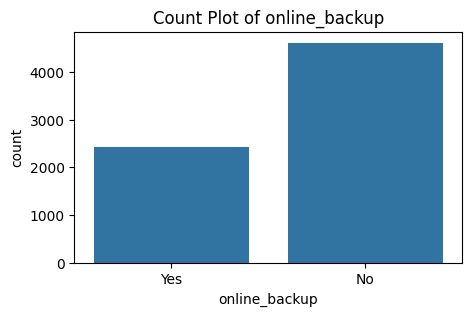

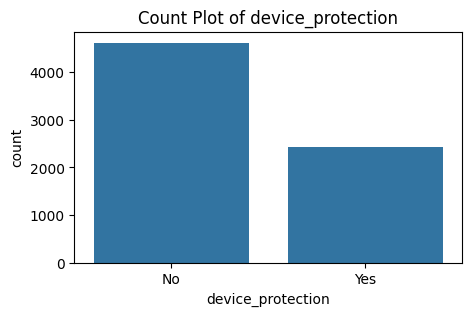

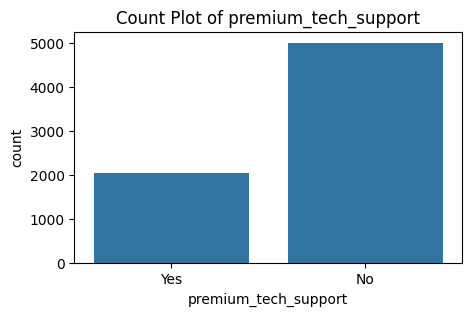

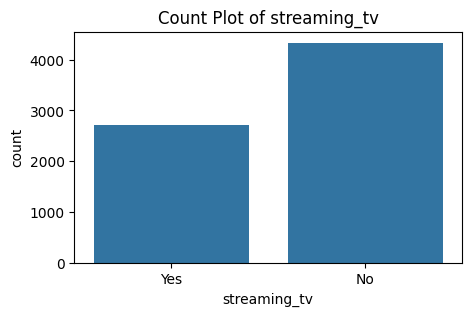

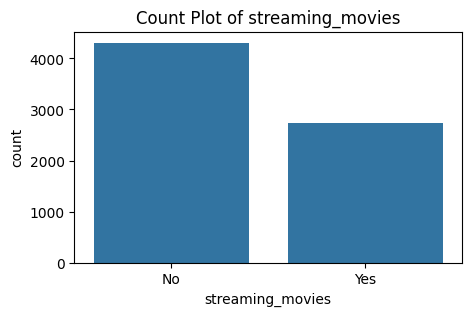

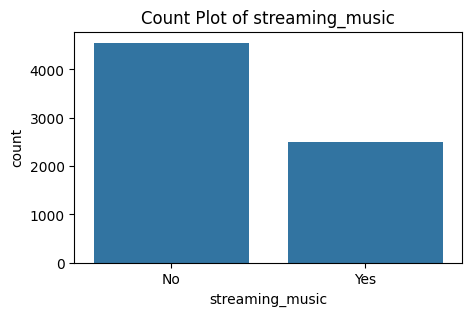

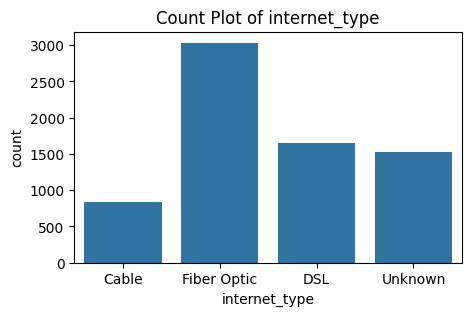

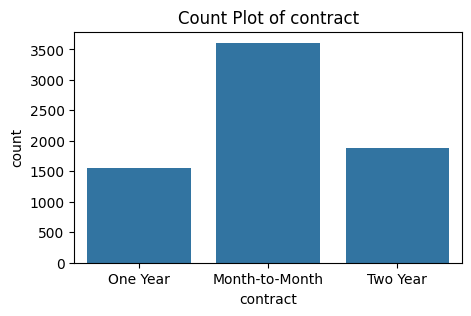

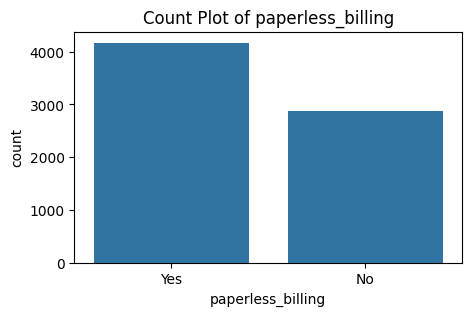

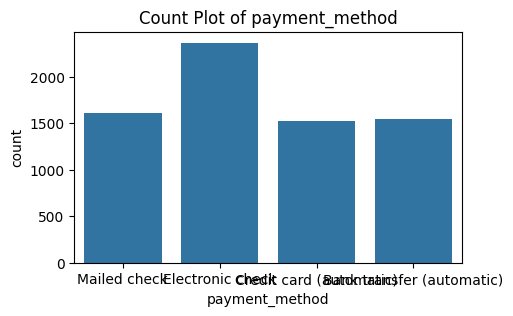

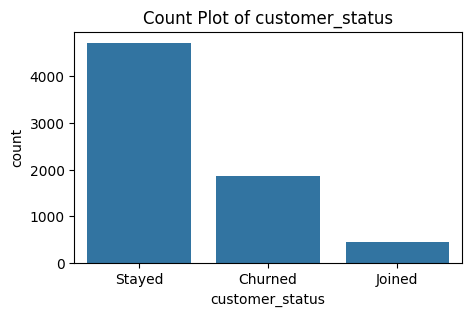

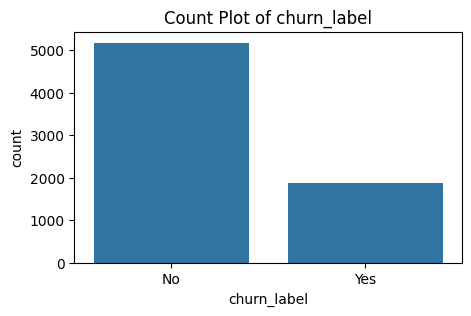

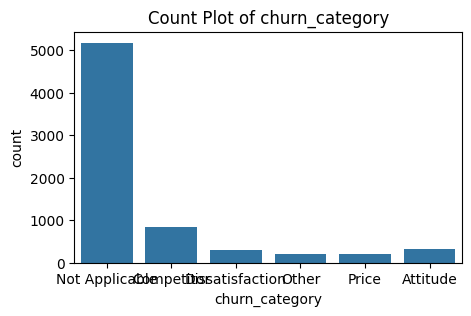

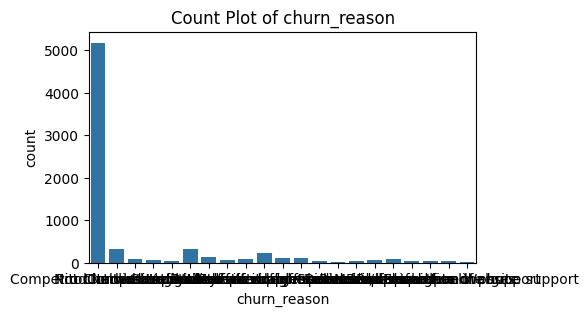

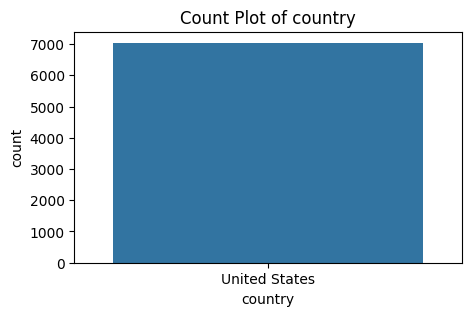

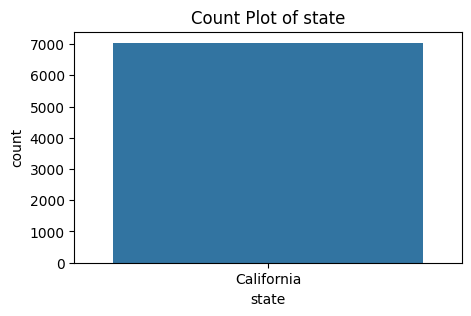

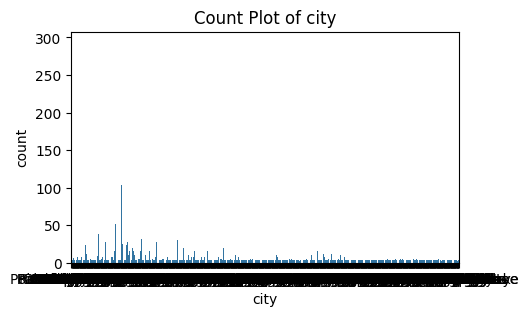

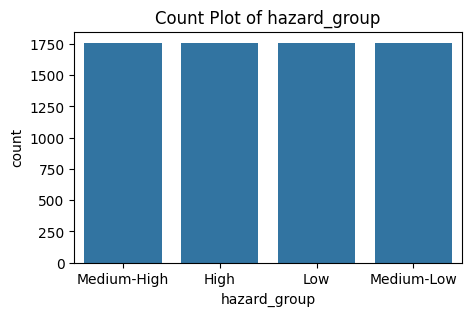

In [ ]:
object_cols = df.select_dtypes(include="object").columns.to_list()

object_cols = ["gender"] + object_cols

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

**4. Data Preprocessing**

In [ ]:
df.head(3)

,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married,tenure,internet_service,phone_service,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,monthly_charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason,country,state,city,zip_code,total_population,latitude,longitude,hazard_score,baseline_hazard,hazard_group
0,Female,37,No,No,Yes,No,0,Yes,9,Yes,Yes,No,16,Yes,No Offer,Yes,2,No,Yes,No,Yes,Yes,No,No,Cable,One Year,Yes,Mailed check,65.6,42.39,593.30,0.00,0,381.51,974.81,3,2205,Stayed,65,No,0,Not Applicable,Not Churned,United States,California,Frazier Park,93225,4498,34.827662,-118.999073,5.019091,0.000385,Medium-High
1,Male,46,No,No,No,No,0,No,9,Yes,Yes,Yes,10,No,No Offer,No,0,No,No,No,No,No,Yes,Yes,Cable,Month-to-Month,No,Mailed check,59.9,10.69,542.40,38.33,10,96.21,610.28,5,5414,Stayed,66,No,0,Not Applicable,Not Churned,United States,California,Glendale,91206,31297,34.162515,-118.203869,6.939038,0.000385,High
2,Male,50,No,No,No,No,0,No,4,Yes,Yes,No,30,Yes,Offer E,No,0,No,No,Yes,No,No,No,No,Fiber Optic,Month-to-Month,Yes,Electronic check,73.9,33.65,280.85,0.00,0,134.60,415.45,1,4479,Churned,71,Yes,1,Competitor,Competitor had better devices,United States,California,Costa Mesa,92627,62069,33.645672,-117.922613,8.285392,0.000194,High


In [ ]:
print(df["churn_value"].value_counts())

churn_value
0    5174
1    1869
Name: count, dtype: int64


Label encoding of categorical fetaures

In [ ]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [ ]:
print(object_columns)

Index(['gender', 'under_30', 'senior_citizen', 'partner', 'dependents',
       'married', 'internet_service', 'phone_service', 'multiple_lines',
       'unlimited_data', 'offer', 'referred_a_friend', 'online_security',
       'online_backup', 'device_protection', 'premium_tech_support',
       'streaming_tv', 'streaming_movies', 'streaming_music', 'internet_type',
       'contract', 'paperless_billing', 'payment_method', 'customer_status',
       'churn_label', 'churn_category', 'churn_reason', 'country', 'state',
       'city', 'hazard_group'],
      dtype='object')


 Revert Categorical variables to numbers by Label Encoding

In [ ]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)


In [ ]:
encoders

{'gender': LabelEncoder(),
 'under_30': LabelEncoder(),
 'senior_citizen': LabelEncoder(),
 'partner': LabelEncoder(),
 'dependents': LabelEncoder(),
 'married': LabelEncoder(),
 'internet_service': LabelEncoder(),
 'phone_service': LabelEncoder(),
 'multiple_lines': LabelEncoder(),
 'unlimited_data': LabelEncoder(),
 'offer': LabelEncoder(),
 'referred_a_friend': LabelEncoder(),
 'online_security': LabelEncoder(),
 'online_backup': LabelEncoder(),
 'device_protection': LabelEncoder(),
 'premium_tech_support': LabelEncoder(),
 'streaming_tv': LabelEncoder(),
 'streaming_movies': LabelEncoder(),
 'streaming_music': LabelEncoder(),
 'internet_type': LabelEncoder(),
 'contract': LabelEncoder(),
 'paperless_billing': LabelEncoder(),
 'payment_method': LabelEncoder(),
 'customer_status': LabelEncoder(),
 'churn_label': LabelEncoder(),
 'churn_category': LabelEncoder(),
 'churn_reason': LabelEncoder(),
 'country': LabelEncoder(),
 'state': LabelEncoder(),
 'city': LabelEncoder(),
 'hazard_gr

In [ ]:
df.head()

,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married,tenure,internet_service,phone_service,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,monthly_charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason,country,state,city,zip_code,total_population,latitude,longitude,hazard_score,baseline_hazard,hazard_group
0,0,37,0,0,1,0,0,1,9,1,1,0,16,1,0,1,2,0,1,0,1,1,0,0,0,1,1,3,65.6,42.39,593.30,0.00,0,381.51,974.81,3,2205,2,65,0,0,3,15,0,0,346,93225,4498,34.827662,-118.999073,5.019091,0.000385,2
1,1,46,0,0,0,0,0,0,9,1,1,1,10,0,0,0,0,0,0,0,0,0,1,1,0,0,0,3,59.9,10.69,542.40,38.33,10,96.21,610.28,5,5414,2,66,0,0,3,15,0,0,368,91206,31297,34.162515,-118.203869,6.939038,0.000385,0
2,1,50,0,0,0,0,0,0,4,1,1,0,30,1,5,0,0,0,0,1,0,0,0,0,2,0,1,2,73.9,33.65,280.85,0.00,0,134.60,415.45,1,4479,0,71,1,1,1,2,0,0,222,92627,62069,33.645672,-117.922613,8.285392,0.000194,0
3,1,78,0,1,1,0,0,1,13,1,1,0,4,1,4,1,1,0,1,1,0,1,1,0,2,0,1,2,98.0,27.82,1237.85,0.00,0,361.66,1599.51,1,3714,0,91,1,1,2,19,0,0,587,94553,46677,38.014457,-122.115432,7.724060,0.000645,0
4,0,75,0,1,1,0,0,1,3,1,1,0,11,1,0,1,3,0,0,0,1,1,0,0,2,0,1,3,83.9,7.38,267.40,0.00,0,22.14,289.54,1,3464,0,68,1,1,2,14,0,0,139,93010,42853,34.227846,-119.079903,8.221078,0.000155,0


**Training and test data split**

In [ ]:
# splitting the features and target
# Drop tất cả cột liên quan đến churn
X = df.drop(columns=[
    'churn_value',
    'churn_score',
    'churn_label',
    'churn_category',
    'churn_reason',
    'customer_status', # (cũng có thể liên quan đến churn)
    'satisfaction_score'
])

# Lấy cột target là churn_value
y = df['churn_value']

In [ ]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(y_train.shape)

(5634,)


In [ ]:
print(y_train.value_counts())

churn_value
0    4138
1    1496
Name: count, dtype: int64


Synthetic Minority Oversampling TEchnique (SMOTE) - Method for generating synthetic data to address the issue of imbalanced datasets

In [ ]:
#!pip install imbalanced-learn


In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print(y_train_smote.shape)

(8276,)


In [ ]:
print(y_train_smote.value_counts())

churn_value
0    4138
1    4138
Name: count, dtype: int64


**5. Model Training**

Training with default hyperparameters

In [ ]:
# dictionary of models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
}

In [ ]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.82
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.88
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.89
----------------------------------------------------------------------
Training LightGBM with default parameters
[LightGBM] [Info] Number of positive: 3310, number of negative: 3310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3890
[LightGBM] [Info] Number of data points in the train set: 6620, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 

In [ ]:
cv_scores

{'Decision Tree': array([0.73067633, 0.76132931, 0.85861027, 0.85981873, 0.87734139]),
 'Random Forest': array([0.7910628 , 0.82296073, 0.92567976, 0.918429  , 0.92628399]),
 'XGBoost': array([0.7826087 , 0.83202417, 0.9347432 , 0.93595166, 0.94138973]),
 'LightGBM': array([0.78683575, 0.83021148, 0.93353474, 0.92567976, 0.93716012]),
 'Gradient Boosting': array([0.7826087 , 0.82537764, 0.93293051, 0.92628399, 0.93353474])}

Random Forest gives the highest accuracy compared to other models with default parameters

In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [ ]:
print(y_test.value_counts())

churn_value
0    1036
1     373
Name: count, dtype: int64


In [ ]:
xgb = XGBClassifier(random_state=42)

In [ ]:
xgb.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

**6. Model Evaluation**

In [ ]:
# evaluate on test data
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.8282469836763662
Confsuion Matrix:
 [[905 131]
 [111 262]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      1036
           1       0.67      0.70      0.68       373

    accuracy                           0.83      1409
   macro avg       0.78      0.79      0.78      1409
weighted avg       0.83      0.83      0.83      1409



In [ ]:
y_test_pred = xgb.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.8282469836763662
Confsuion Matrix:
 [[909 127]
 [115 258]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      1036
           1       0.67      0.69      0.68       373

    accuracy                           0.83      1409
   macro avg       0.78      0.78      0.78      1409
weighted avg       0.83      0.83      0.83      1409



In [ ]:
# save the trained model as a pickle file
model_data = {"model": rfc, "features_names": X.columns.tolist()}


with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

**7. Load the saved  model and  build a Predictive System**

In [ ]:
# load teh saved model and the feature names

with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [ ]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [ ]:
print(feature_names)

['gender', 'age', 'under_30', 'senior_citizen', 'partner', 'dependents', 'number_of_dependents', 'married', 'tenure', 'internet_service', 'phone_service', 'multiple_lines', 'avg_monthly_gb_download', 'unlimited_data', 'offer', 'referred_a_friend', 'number_of_referrals', 'online_security', 'online_backup', 'device_protection', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'internet_type', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'avg_monthly_long_distance_charges', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue', 'cltv', 'country', 'state', 'city', 'zip_code', 'total_population', 'latitude', 'longitude', 'hazard_score', 'baseline_hazard', 'hazard_group']


In [ ]:
input_data = {
  'gender': 'Female',
  'age': 29,
  'under_30': 'Yes',
  'senior_citizen': 'No', # đổi thành Yes/No (nếu mô hình gốc dùng dạng này)
  'partner': 'No',
  'dependents': 'No',
  'number_of_dependents': 0,
  'married': 'No',
  'tenure': 10,
  'internet_service': 'Yes',
  'phone_service': 'Yes',  # lưu ý phải khớp với dataset gốc
  'multiple_lines': 'No',
  'avg_monthly_gb_download': 20,
  'unlimited_data': 'No',
  'offer': 'No Offer',
  'referred_a_friend': 'No',
  'number_of_referrals': 0,
  'online_security': 'No',
  'online_backup': 'Yes',
  'device_protection': 'No',
  'premium_tech_support': 'No',
  'streaming_tv': 'No',
  'streaming_movies': 'No',
  'streaming_music': 'Yes',
  'internet_type': 'DSL',
  'contract': 'Month-to-Month',
  'paperless_billing': 'Yes',
  'payment_method': 'Electronic check',
  'monthly_charges': 65.3,
  'avg_monthly_long_distance_charges': 5.6,
  'total_charges': 653.0,
  'total_refunds': 0,
  'total_extra_data_charges': 0,
  'total_long_distance_charges': 56.0,
  'total_revenue': 653.0,
  'cltv': 450,
  'country': 'United States',
  'state': 'California',
  'city': 'Los Angeles',
  'zip_code': 90001,
  'total_population': 100000,
  'latitude': 34.0522,
  'longitude': -118.2437,
  'hazard_score': 1.75,
  'baseline_hazard': 0.15,
  'hazard_group': 'Medium-Low'
}



input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)


# encode categorical featires using teh saved encoders
# Encode categorical features safely (bỏ qua các cột không có trong dữ liệu)
for column, encoder in encoders.items():
    if column in input_data_df.columns:  # Chỉ encode nếu cột tồn tại
        input_data_df[column] = input_data_df[column].map(lambda x: 'Unknown' if x not in encoder.classes_ else x)
        input_data_df[column] = encoder.transform(input_data_df[column])
    else:
        print(f"🔹 Bỏ qua encoding cho cột không tồn tại: {column}")


# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

🔹 Bỏ qua encoding cho cột không tồn tại: customer_status
🔹 Bỏ qua encoding cho cột không tồn tại: churn_label
🔹 Bỏ qua encoding cho cột không tồn tại: churn_category
🔹 Bỏ qua encoding cho cột không tồn tại: churn_reason
[1]
Prediction: Churn
Prediciton Probability: [[0.46 0.54]]


In [ ]:
encoders

{'gender': LabelEncoder(),
 'under_30': LabelEncoder(),
 'senior_citizen': LabelEncoder(),
 'partner': LabelEncoder(),
 'dependents': LabelEncoder(),
 'married': LabelEncoder(),
 'internet_service': LabelEncoder(),
 'phone_service': LabelEncoder(),
 'multiple_lines': LabelEncoder(),
 'unlimited_data': LabelEncoder(),
 'offer': LabelEncoder(),
 'referred_a_friend': LabelEncoder(),
 'online_security': LabelEncoder(),
 'online_backup': LabelEncoder(),
 'device_protection': LabelEncoder(),
 'premium_tech_support': LabelEncoder(),
 'streaming_tv': LabelEncoder(),
 'streaming_movies': LabelEncoder(),
 'streaming_music': LabelEncoder(),
 'internet_type': LabelEncoder(),
 'contract': LabelEncoder(),
 'paperless_billing': LabelEncoder(),
 'payment_method': LabelEncoder(),
 'customer_status': LabelEncoder(),
 'churn_label': LabelEncoder(),
 'churn_category': LabelEncoder(),
 'churn_reason': LabelEncoder(),
 'country': LabelEncoder(),
 'state': LabelEncoder(),
 'city': LabelEncoder(),
 'hazard_gr

**To do:**
1. Implement Hyperparameter Tuining
2. Try Model Selection
3. Try downsampling
4. Try to address teh overfitting
5. Try Startified k fold CV